## 1.1 Load data

. 예제로 사용할 펭귄 데이터를 불러옵니다.

. seaborn에 내장되어 있습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head

<bound method NDFrame.head of     species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...   

## 1.2 figura and axes

.matplotilb으로 도화지 figure를 깔고 축공간 axes를 만듭니다.
.1*2축공간을 구성합니다.

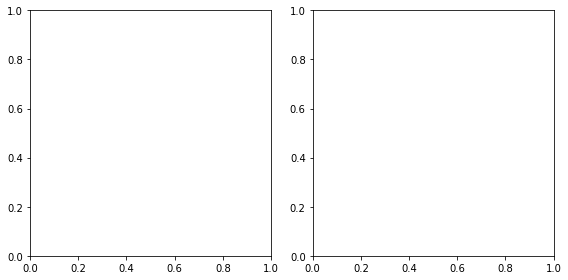

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

fig.tight_layout()


## 1.3 plot with matplotlib

.matplotlib 기능을 이용해서 신점도를 그립니다.

  . x축은 부리 길이 bill length
.y축은 부리 위 아래 두께 bill depth
.색상은 종species로 합니다.
Adelie, Chinstrap, Gentoo이 있습니다.

. 두 축공간 중 왼쪽에만 그립니다.
        . 

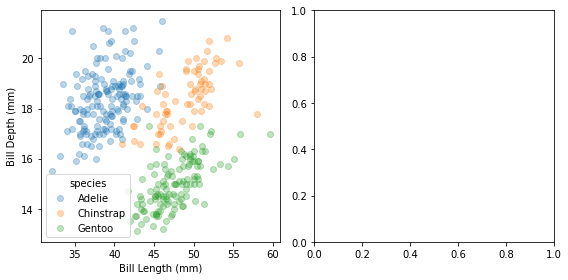

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib
for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.4 plot with seaborn

.이번엔 같은 plot을 seaborn으로 그려봅니다.
.위 코드에 아래 세 줄만 추가합니다.

In [ ]:
# plot 1 : seaborn
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(299.79999999999995, 0.5, 'Bill Depth (mm)')

.단 세 줄로 거의 동일한 그림이 나왔습니다

.scatter plot의 점 크기만 살짝 작습니다
.
.label의 투명도만 살짝 다릅니다

.seaborn 명령 scatterplot()을 그대로 사용했습니다.

.x축과 y축 label도 바꾸었습니다.
ax=axes[1] 인자에서 볼 수 있듯, 존재하는 axes에 그림만 얹었습니다.

.matplotlib 틀 + seaborn 그림 이므로, matplotlib 명령이 모두 통합니다

. 파이썬 코드는 다음과 같습니다.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

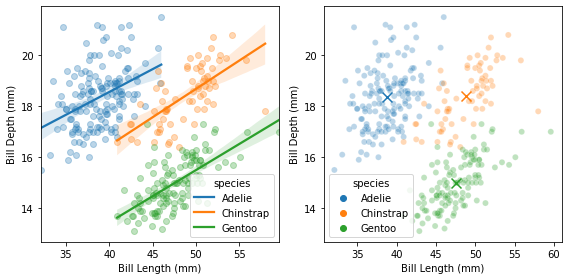

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
				  
    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data=penguins.loc[penguins["species"]==s], 
                scatter=False, ax=axes[0])
    
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn + matplotlib
# seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

for i, s in enumerate(species_u):
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
                   penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
                   c=f"C{i}", alpha=1, marker="x", s=100
                  )

fig.tight_layout()

1.6 seaborn + seaborn + mataplotlib

. 안 될 이유가 없습니다.
. seaborn scatterplot + seaborn kdeplot + matplotlib text 입니다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


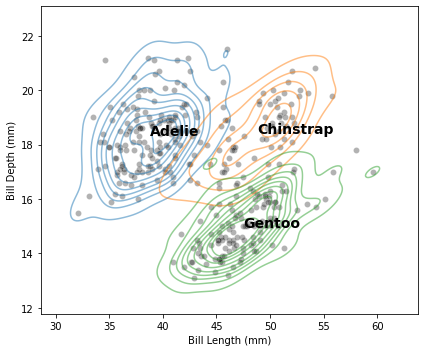

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color="k", data=penguins, alpha=0.3, ax=ax, legend=False)

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.5, ax=ax, legend=False)

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
            s = s, fontdict={"fontsize":14, "fontweight":"bold","color":"k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.7 결론 

. seaborn을 matplotlib과 마음껏 섞어쓰세요.

. 단, axes를 반환하는 명렁어에 한해서 말입니다.

.이런 명령어를 axes-level function 이라고합니다.